In [1]:
import matplotlib.pyplot as plt
import seaborn as sbs
import pandas as pd
import numpy as np

In [2]:
def user_review_pctg(city, data):
    usr_stats = data.groupby("userId").reviewId.apply(lambda x: len(x.unique())).reset_index()
    res = []
    for r in range(1,11):
        n_usr = len(usr_stats[usr_stats["reviewId"]>=r])
        pctg = (n_usr/len(usr_stats))*100
        res.append((r,pctg, city))

    # res = pd.DataFrame(res, columns=["x", "y", "city"])
    return res

def user_img_pctg(city, data):
    usr_stats = data.groupby("userId").n_img.sum().reset_index()

    res = []
    for r in range(6):
        n_usr = len(usr_stats[usr_stats["n_img"]==r])
        pctg = (n_usr/len(usr_stats))*100
        res.append((r,pctg, city))

    return res

def plot_user_pctg(data, name):            
    cm = 1/2.54  # centimeters in inches
    fig, axes =plt.subplots(figsize=(16*cm, 8*cm))

    for city, cdt in data.groupby("city"):
        if city =="gijon": city = "gijón"
        axes.plot(cdt["x"], cdt["y"], label=city.title())       
        axes.scatter(cdt["x"], cdt["y"])       

    fig.tight_layout()
    plt.legend(loc="upper right")
    plt.xticks(range(11), map(lambda x: ""+str(x),range(11)))
    plt.yticks(range(0, 101, 10), map(lambda x: str(x)+"%", range(0, 101, 10)))

    plt.savefig(f"{name}_usr_pctg.pdf")
    plt.show()
    

23.05299590956084
19.6659235960546
12.955196862271837
11.08406113537118
7.447379281881965


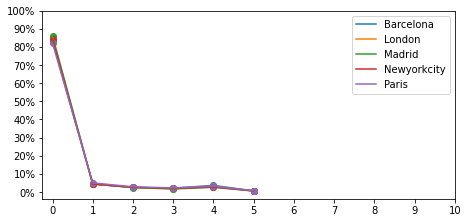

In [120]:
cities = {"gijon":{"name":"Gijón", "pop":0.3}, "barcelona":{"name":"Barcelona", "pop":1.6}, "paris":{"name":"Paris", "pop":2.1},
          "madrid":{"name":"Madrid", "pop":3.2}, "newyorkcity":{"name":"New York", "pop":8.3}, "london":{"name":"London", "pop":8.9}} # Ciudades con su población
stats = []
stats2 = []

all_user_review_pctg_data = []
reviews_most_popular_item = []

dataset="pois"

for city in cities.keys():
  
  if dataset == "restaurants":
    data_path = f"/media/nas/datasets/tripadvisor/restaurants/{city}/"
    reviews = pd.read_pickle(data_path+"reviews.pkl")
  
  elif dataset == "pois":
    if city== "gijon": continue

    data_path = f"/media/nas/datasets/tripadvisor/pois/DATA_byList/{city}/"
    reviews = pd.read_pickle(data_path+"df.pickle")
    reviews = reviews.rename(columns={"imageId":"images", "idPOI":"restaurantId"})

  # restaurants = pd.read_pickle(data_path+"restaurants.pkl")
  # users = pd.read_pickle(data_path+"users.pkl")

  reviews["n_img"] = reviews.images.apply(lambda x: len(x))

  '''
  n_reviews = len(reviews.reviewId.unique())
  n_images  = reviews.n_img.sum()
  n_users = len(reviews.userId.unique())
  n_rest = len(reviews.restaurantId.unique())

  stats.append((f"\{city}", cities[city], n_reviews, n_users, n_rest, n_images))

  # AVG Reviews per user/item
  avg_rvw_usr = np.round(reviews.groupby("userId").reviewId.apply(lambda x: len(x.unique())).mean(), 2)
  avg_rvw_itm = np.round(reviews.groupby("restaurantId").reviewId.apply(lambda x: len(x.unique())).mean(), 2)
  # AVG Images per user/item
  avg_img_usr = np.round(reviews.groupby("userId").n_img.sum().mean(), 2)
  avg_img_itm = np.round(reviews.groupby("restaurantId").n_img.sum().mean(), 2)
  # AVG Items per user
  avg_itm_usr = np.round(reviews.groupby("userId").restaurantId.apply(lambda x: len(x.unique())).mean(), 2)

  stats2.append((f"\{city}", avg_rvw_usr, avg_rvw_itm, avg_img_usr, avg_img_itm, avg_itm_usr))
  '''

  # Gráficos
  reviews_most_popular_item.append((cities[city]["name"], cities[city]["pop"], (reviews.groupby("restaurantId").reviewId.count().max() / len(reviews))*100))
  
  print((reviews.groupby("restaurantId").n_img.sum().max() / reviews.n_img.sum())*100)

  user_review_pctg_data = user_img_pctg(city, reviews)
  all_user_review_pctg_data.extend(user_review_pctg_data)

stats = pd.DataFrame(stats, columns=["Dataset", "City", "Reviews", "Users", "Items", "Images"])
# print(stats.to_latex(index=False, escape=False))

stats2 = pd.DataFrame(stats2, columns=["Dataset", "avg_rvw_usr", "avg_rvw_itm", "avg_img_usr", "avg_img_itm", "avg_itm_usr"])
# print(stats2.to_latex(index=False, escape=False))

# Gráficos
all_user_review_pctg_data = pd.DataFrame(all_user_review_pctg_data, columns=["x", "y", "city"])
plot_user_pctg(data=all_user_review_pctg_data, name=dataset)


### Plot percentage of the most reviewed item

No handles with labels found to put in legend.
No handles with labels found to put in legend.


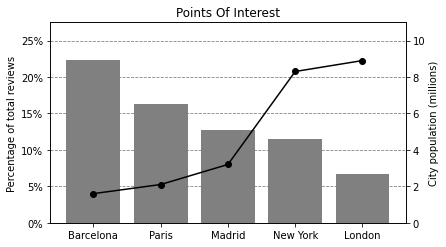

In [115]:
reviews_most_popular_item = pd.DataFrame(reviews_most_popular_item, columns=["x", "pop" ,"y"])

cm = 1/2.54  # centimeters in inches
fig, axes =plt.subplots(figsize=(16*cm, 9*cm))

axes2 = axes.twinx()

axes.set_axisbelow(True)
axes.yaxis.grid(color='gray', linestyle='dashed')

axes.bar(x=reviews_most_popular_item["x"], height=reviews_most_popular_item["y"], color="gray")     
axes2.plot(reviews_most_popular_item["x"], reviews_most_popular_item["pop"], color="black")     
axes2.scatter(reviews_most_popular_item["x"], reviews_most_popular_item["pop"], color="black")     

plt.legend(loc="upper right")
# plt.xticks(range(11), map(lambda x: ""+str(x),range(11)))

if dataset=="restaurants": 
    axes.set_yticks(range(0, 6, 1))
    axes.set_yticklabels(map(lambda x: str(x)+"%", range(0, 6, 1)))
    axes.set_ylim(0, 5.5)

    plt.title("Restaurants")

else: 
    axes.set_yticks(range(0, 26, 5))
    axes.set_yticklabels(map(lambda x: str(x)+"%", range(0, 26, 5)))
    axes.set_ylim(0, 27.5)

    plt.title("Points Of Interest")


axes2.set_yticks(range(0, 12, 2))
axes2.set_ylim(0, 11)
axes2.set_yticklabels(range(0, 12, 2))

axes.set_ylabel("Percentage of total reviews")
axes2.set_ylabel("City population (millions)")

plt.legend().remove()
fig.tight_layout()

plt.savefig(f"{dataset}_popular_item_reviews.pdf")

plt.show()

In [86]:
reviews_most_popular_item

,x,pop,y
0,Gijón,0.3,4.992060
1,Barcelona,1.6,0.489545
2,Paris,2.1,0.590385
3,Madrid,3.2,0.949403
4,New York,8.3,1.532573
5,London,8.9,0.641918


In [ ]:
plot_user_pctg(data=all_user_review_pctg_data, name=dataset)
all_user_review_pctg_data

In [1]:
from inspect import stack

res = []
for x, gd in all_user_review_pctg_data.groupby("city"):
    line = [x]
    line.extend(gd.y.values)
    res.append(line)
res

'''
colnames = ["city"]
colnames.extend(range(11))
res = pd.DataFrame(res, columns=colnames)
plt = res.plot(figsize=(16*cm, 8*cm), kind="bar", stacked=True)
plt.set_xticklabels(list(cities.keys()))
# plt.set_yticklabels(range(60,101, 10))

plt.legend().remove()
# plt.legend(loc="lower left", ncol=len(res.columns))
# plt.xticks(range(6), cities.keys())
'''

NameError: name 'all_user_review_pctg_data' is not defined